# Calculo de las metricas de un json

In [1]:
import os
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

### Lectura del documento

In [2]:
# Ruta de los archivos con los datos obtenidos por el "Tracking system"
path = '../DataTracker'

In [ ]:
def loadJsonData(path):
    jsonData = []
    
    # Obtener lista de archivos en la carpeta
    jsonFiles = os.listdir(path)
    
    # Recorrer y filtrar solo los archivos JSON
    for file in jsonFiles:
        if file.endswith('.json'):
            ruta_archivo = os.path.join(path, file)
            
            # Leer el contenido del archivo JSON
            with open(ruta_archivo, 'r', encoding='utf-8') as f:
                info = json.load(f)
                jsonData.extend(info)
    
    return jsonData

In [3]:
# Leer los archivos JSON y obtener su información
data = loadJsonData(path)

# Se ordena la información del documento en base el timestamp
sorted_data = sorted(data, key=lambda x: x['timestamp'])

### Parseo de Eventos

In [4]:
# Numero total de eventos
num_events = len(sorted_data)
# Indice de eventos
index = 0
sessions = []
sesion = 0
test_list = []
test = 0
pos_list = []

In [5]:
def parseEvent(event):
    global test_list
    global pos_list
    global sesion
    global test
    global sessions
    if event['typeEvent'] == "LoginEvent":
        test = 0
        #print("\nInicio de sesion: ", sesion)
    elif event['typeEvent'] == "LogoutEvent":
        sessions.append(test_list.copy())
        test_list.clear()
        #print("\nFin de sesion: ", sesion)
        sesion += 1
    # Empieza el test
    elif event['typeEvent'] == "StartTestEvent":
       print("\nInicio de test: ", test)
    # Acaba el test
    elif event['typeEvent'] == "EndTestEvent":
        test_list.append(pos_list.copy())
        pos_list.clear()
        #print("\nFin de test: ", test)
        test += 1
    #Evento de movimeinto de un bot
    elif event['typeEvent'] == "BotPositionEvent":
        pos_list.append(event)
    return  True

In [6]:
# Recorro todos los eventos generados
while index < num_events:
    currentEvent = sorted_data[index]
    consumeEvent = parseEvent(currentEvent)
    index += 1


Inicio de test:  0

Inicio de test:  0


### Mapa de calor con las posiciones

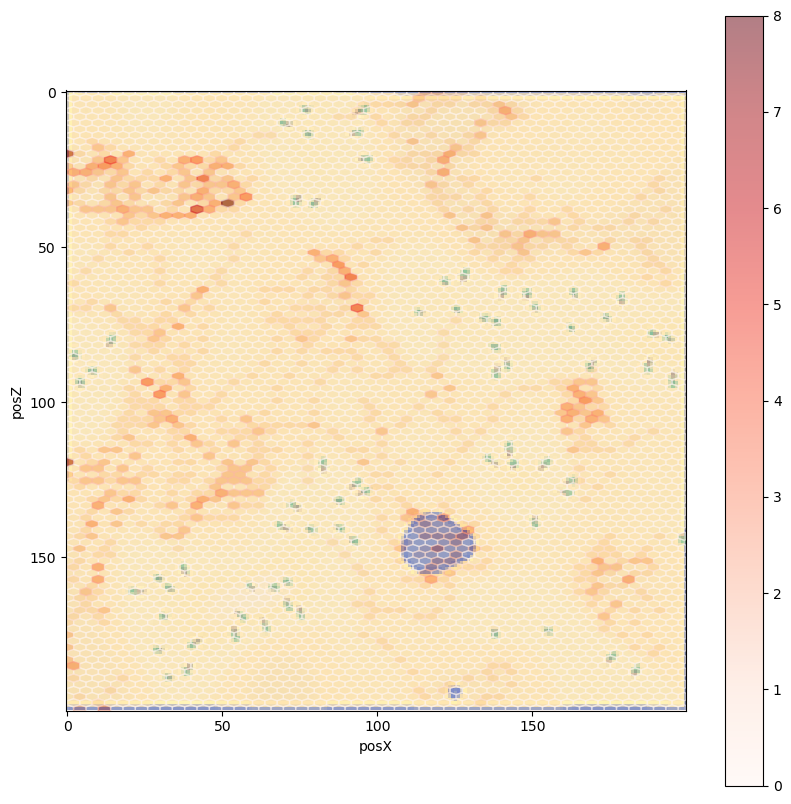

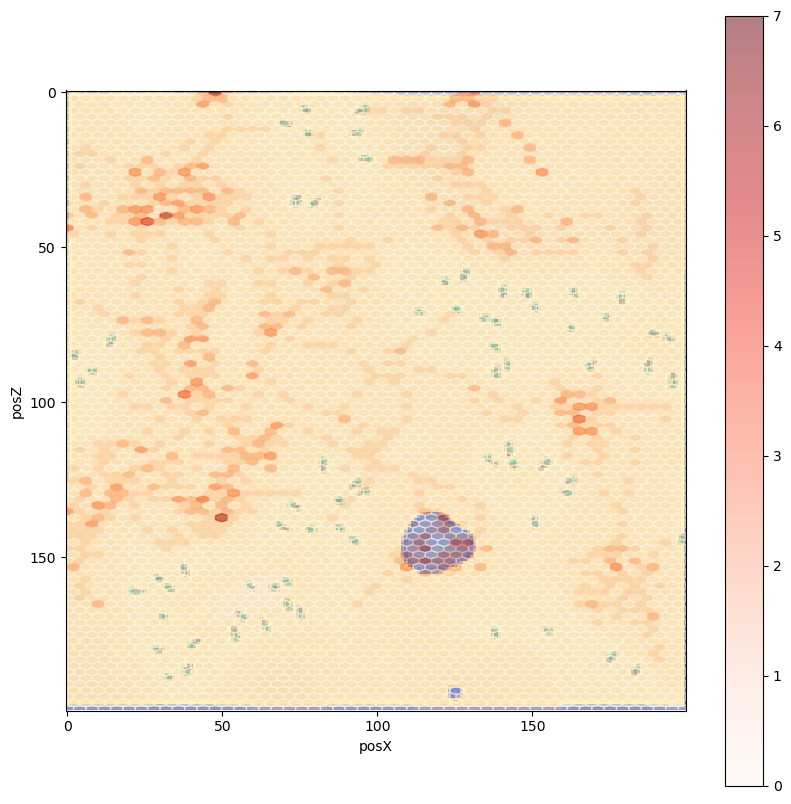

In [7]:
# Guardar la imagen del mapa
img = plt.imread("images/map3.png")

for i, currentSession in enumerate(sessions):
    for j, currentTest in enumerate(currentSession):
        dfTest = pd.DataFrame(currentTest)
        # Definir las dimensiones del mapa
        fig,ax = plt.subplots(figsize=(10,10)) #Tamaño en pulgadas de la imagen cuando se guarde
        ax.imshow(img)
        # Dibujar el mapa de calor
        dfTest.plot.hexbin(fig = fig, ax = ax,x="posX", y="posZ", reduce_C_function=sum, gridsize=(50,50), extent=[0,199,0,199], alpha=0.5, cmap='Reds')
        ax.set_xticks(range(0, 199, 50))
        ax.set_yticks(range(0, 199, 50))
        fig.savefig('heatmaps/map2/heatmapSession'+str(i)+'Test'+str(j)+'.png')